# Flight Price Analysis Using PACE #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fds = pd.read_csv('Clean_Dataset.csv')
fds.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [3]:
fds.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [4]:
fds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
fds.isnull().sum()
fds.dropna(inplace=True)

In [6]:
fds.drop_duplicates(inplace=True)

# PACE Process #

In [7]:
fds.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

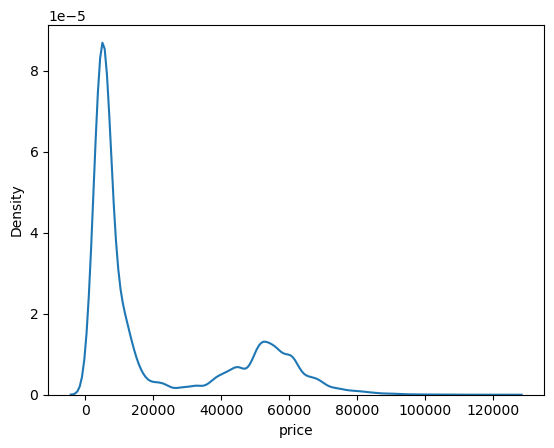

In [8]:
sns.kdeplot(data = fds['price'])

<AxesSubplot:ylabel='airline'>

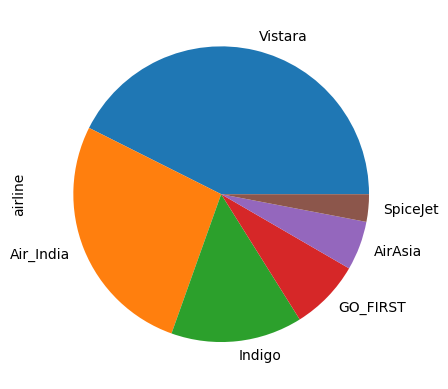

In [9]:
fds['airline'].value_counts().plot(kind='pie')

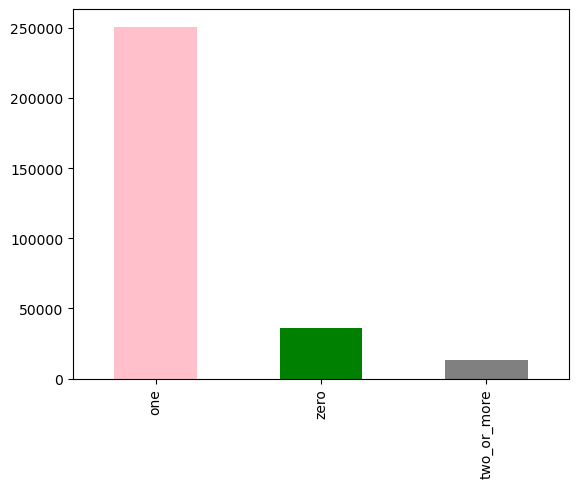

In [10]:
flight_stop = fds['stops'].value_counts()
colors = ['pink', 'Green', 'grey']
flight_stop.plot(kind='bar', color = colors)
plt.show()

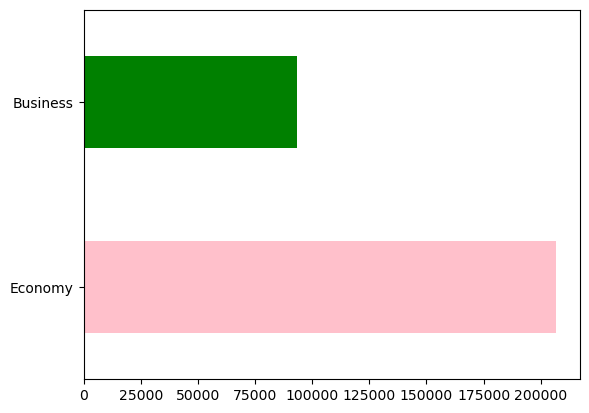

In [11]:
# Create a Visuallization for class Variation #
c = ['pink', 'Green']
class_count = fds['class'].value_counts().plot(kind= 'barh', color = c)

<AxesSubplot:ylabel='price'>

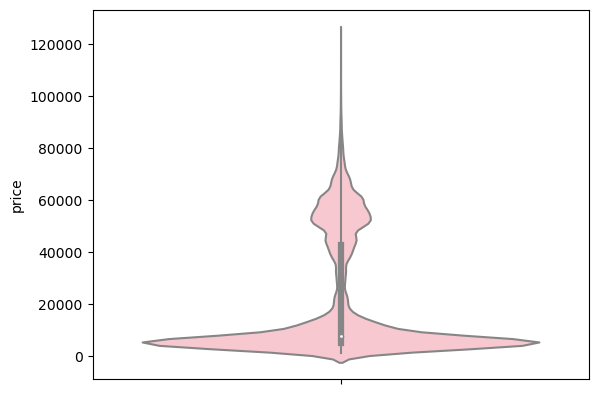

In [12]:
sns.violinplot(y = fds['price'], color= 'pink', inner='box')

In [13]:
fds['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [14]:
fds['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [25]:
fds.sort_values(by = 'price', ascending= False).head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.50,3,123071
216096,216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
215859,215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
277345,277345,Vistara,UK-870,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.42,3,115211
270999,270999,Vistara,UK-772,Kolkata,Morning,one,Evening,Hyderabad,Business,9.50,17,114705
290568,290568,Vistara,UK-832,Chennai,Early_Morning,one,Night,Mumbai,Business,15.08,5,114704
230092,230092,Vistara,UK-996,Mumbai,Evening,one,Evening,Bangalore,Business,22.50,2,114523
219183,219183,Vistara,UK-707,Delhi,Evening,two_or_more,Night,Hyderabad,Business,27.42,2,114507
215858,215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
241599,241599,Vistara,UK-996,Mumbai,Evening,one,Morning,Chennai,Business,15.42,3,111964


In [26]:
fds[['airline', 'price']].groupby(['airline']).mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


In [31]:
airline_order = ['AirAsia', 'Air_India', 'GO_FIRST','Indigo', 'SpiceJet', 'Vistara']

<AxesSubplot:xlabel='price', ylabel='airline'>

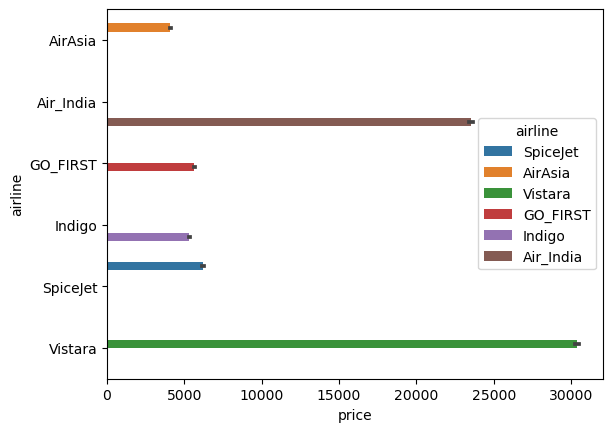

In [36]:
sns.barplot(data=fds, x = 'price', y= 'airline' ,hue= 'airline' ,order= airline_order )

# Sampling Data #

In [41]:
sampled_data = fds.sample(n=5000, replace=True, random_state=23109)
sampled_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
57589,57589,GO_FIRST,G8-345,Mumbai,Night,one,Morning,Bangalore,Economy,11.67,28,5102
142184,142184,Vistara,UK-720,Kolkata,Early_Morning,two_or_more,Night,Bangalore,Economy,13.25,47,8111
199352,199352,AirAsia,I5-1229,Chennai,Evening,one,Late_Night,Kolkata,Economy,9.50,18,2361
156981,156981,Vistara,UK-880,Hyderabad,Afternoon,zero,Afternoon,Delhi,Economy,2.25,38,2665
195902,195902,GO_FIRST,G8-304,Chennai,Afternoon,one,Late_Night,Bangalore,Economy,10.83,28,4612
...,...,...,...,...,...,...,...,...,...,...,...,...
184448,184448,Indigo,6E-6113,Chennai,Afternoon,one,Night,Delhi,Economy,7.67,30,4071
287016,287016,Air_India,AI-840,Hyderabad,Night,one,Morning,Chennai,Business,12.08,37,51595
24565,24565,GO_FIRST,G8-338,Delhi,Morning,one,Evening,Kolkata,Economy,7.00,26,6395
173093,173093,Indigo,6E-6467,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,6.08,23,5293


In [42]:
estimate1 = sampled_data['price'].mean() ; print(estimate1)

20871.866


In [43]:
estimate2 = fds['price'].mean() ; print(estimate2)

20889.660523133203


The mean of your sampling distribution is essentially identical to the population mean, which is
also about 20871

In [44]:
fds['flight'].describe()

count     300153
unique      1561
top       UK-706
freq        3235
Name: flight, dtype: object